In [1]:
from lib.unsupervised_learning import *

In [2]:
df = load_dataset('final_cleaned.csv').iloc[:,1:]


In [4]:
# Adding succeeded column

success_rate = 4000000

df.loc[(df["status"]==1)&(df['total_raised']>success_rate), 'succeeded'] = 1
df.loc[(df["status"]==0)|(df['total_raised']<=success_rate), 'succeeded'] = 0

In [5]:
cat_cols = ['founded', 'business model','employees','product stage','status','fund_stage','succeeded']
num_cols = ['total_raised','total_rounds', 'investors','ipo_price', 'geo_market_per']
tag_cols = [col for col in df.columns if col.startswith('tag_')]
targetmarket_cols = [col for col in df.columns if col.startswith('targetmarket_')]
sector_list = [col for col in df.columns if col.startswith("sector_")]
target_ind_list = [col  for col in df.columns if col.startswith("target_industry_")]
technology_list = [col  for col in df.columns if col.startswith("core_technology_")]
bin_cols = tag_cols + targetmarket_cols + sector_list + target_ind_list + technology_list

In [6]:
# X1 is the entire table without company name and about

X1 = df.iloc[:,2:]
print(X1.shape)
df_scaled = scale_dataset(X1)

(10070, 2862)


In [7]:
# X2 is the table without the binary columns

X2 = df[cat_cols+num_cols]
print(X2.shape)
df_scaled2 = scale_dataset(X2)

(10070, 12)


KMeans

In [ ]:
# Perform kmeans on X1 - all columns

method, score, n = get_best_kmeans_values(df_scaled, range(2,10), ['random','k-means++'] ,10, None)
method, score, n

In [8]:
# Perform kmeans on X2 - no binary columns
# ~ 30 sec runtime

method, score, n = get_best_kmeans_values(df_scaled2, range(2,10), ['random','k-means++'] ,10, None)
method, score, n

(0.40936074501595177, 2, 'k-means++')

Hierarchical clustering

In [ ]:
# Perform hierarchical clustering on X1 - all columns

df_model, best_score, best_linkage, best_n = get_best_linkage_method(df_scaled, [3], ['ward', 'complete', 'average', 'single'])
best_score, best_linkage, best_n

In [9]:
# Perform hierarchical clustering on X2 - no binary columns
# ~ 2 min runtime

df2_model, best_score, best_linkage, best_n = get_best_linkage_method(df_scaled2, range(3,10), ['ward', 'complete', 'average', 'single'])
best_score, best_linkage, best_n

(0.8492227659408527, 'single', 3)

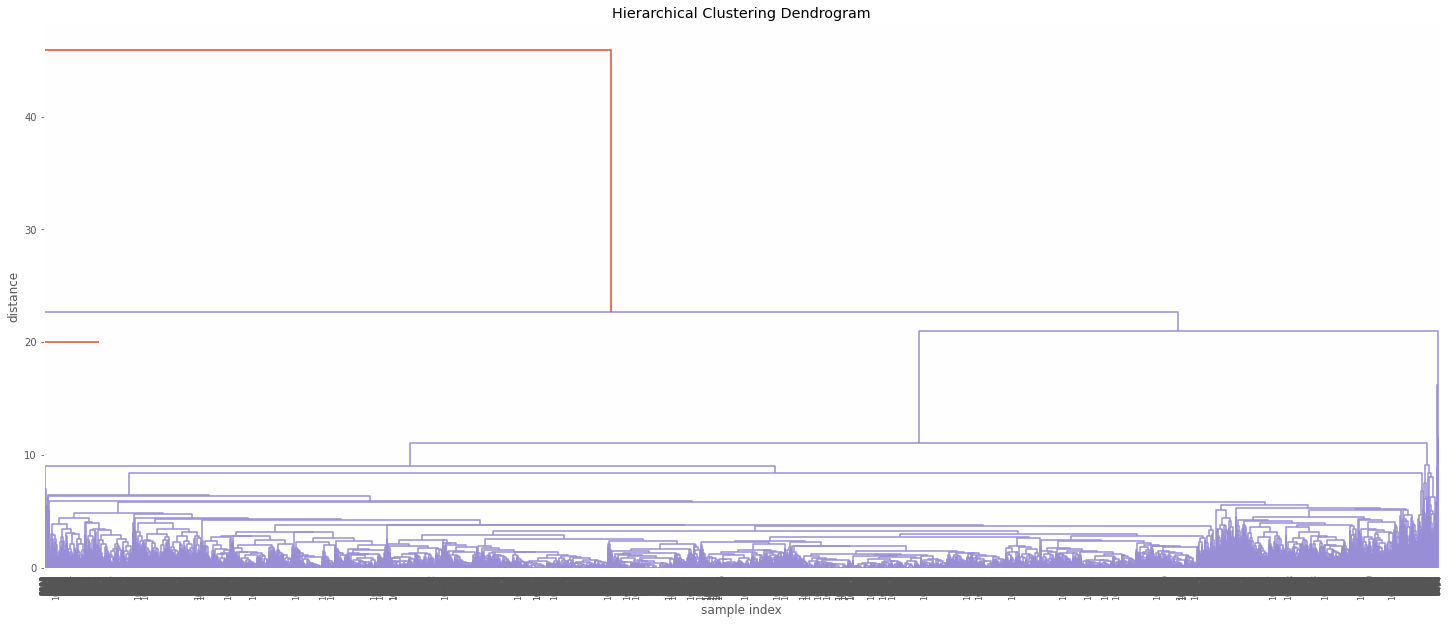

In [20]:
# Plotting dendrogram for best_linkage param
# ~ 4 min runtime

Z = linkage(df_scaled2, 'average') # generate the linkage array
# dendrogram plot
plt.figure(figsize=(25, 10))
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('sample index')
plt.ylabel('distance')
dendrogram(Z,
    leaf_rotation=90.,  # rotates the x axis labels
    leaf_font_size=8.,  # font size for the x axis labels
)
plt.hlines(20, 0, 4000)
plt.show()

We can see the line cutting the 

DBScan

In [19]:
# Perform DBScan on X1 - all columns

score, best_eps, best_min = get_best_params_for_dbscan(df_scaled, [3],[5])
score, best_eps, best_min

ValueError: Number of labels is 1. Valid values are 2 to n_samples - 1 (inclusive)

In [18]:
# Perform DBScan on X2 - no binary columns

score, best_eps, best_min = get_best_params_for_dbscan(df_scaled, [3,5,10,15],[2,3,4,5,6,7,8,9])
score, best_eps, best_min

ValueError: Number of labels is 1. Valid values are 2 to n_samples - 1 (inclusive)